# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [4]:
tips = pd.read_excel(r'C:\Users\ANUBHAV CHAUHAN\Desktop\Python Assignment\Python Assignment 3\Tips Quick EDA exercise v0.1 (5).xlsx')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [7]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,NaN,NaN,0.356557,0.618852,NaN,NaN,NaN


In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         245 non-null    object 
 3   smoker      245 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
#checking for null values.
tips.isnull().sum().sort_values(ascending= False)

size          1
time          1
day           1
tip           1
total_bill    1
smoker        0
sex           0
dtype: int64

In [16]:
#dropping null values.
tips = tips.dropna()

In [17]:
tips.isnull().sum().sort_values(ascending= False)

size          0
time          0
day           0
smoker        0
sex           0
tip           0
total_bill    0
dtype: int64

### 1.What is the overall average tip?


In [19]:
print('The overall average tip is ....',tips['tip'].mean())

The overall average tip is .... 2.9982786885245902


### 2.Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?


In [31]:
tips['tip'].aggregate(np.median)

2.9

In [32]:
tips['tip'].aggregate(np.mean)

2.9982786885245902

In [33]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [38]:
print('No, the median {} and mean {} are no different for tip'.format(tips['tip'].aggregate(np.median),tips['tip'].aggregate(np.mean)))

No, the median 2.9 and mean 2.9982786885245902 are no different for tip


### This tells  me about field that even if we take mean value for analysis there will be still no issue of the outliers because mean and median are both same therefore whatever we pickup there will be no issue.

### 3	Prepare a boxplot for 'tip', are there any outliers?


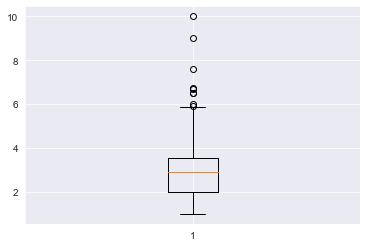

Yes, there are Outliers in tip


In [41]:
plt.boxplot(tips['tip'])
plt.show()
print('Yes, there are Outliers in tip')

### 4	Prepare a boxplot for 'total_bill', are there any outliers?


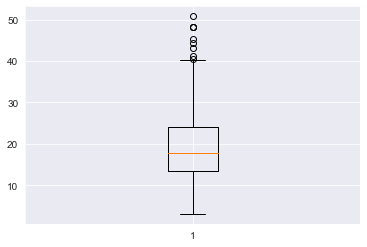

Yes, there are some outliers above upper extreme in total_bill.


In [44]:
plt.boxplot(tips['total_bill'])
plt.show()
print('Yes, there are some outliers above upper extreme in total_bill.')

### 5	Gender: what is the percent of females in the data? 


In [66]:
pd.crosstab(tips['sex'].count(),tips['sex']).apply(lambda r: (r/r.sum())*100 ,axis=1)


sex,Female,Male
row_0,,
244,35.655738,64.344262


### 6	Prepare a bar plot with the bars representing the percentage of records for each gender.


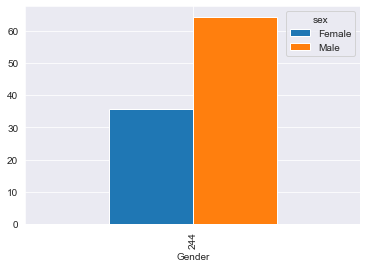

In [78]:
ax = pd.crosstab(tips['sex'].count(),tips['sex']).apply(lambda r: (r/r.sum())*100 ,axis=1).plot(kind = 'bar')
ax.set_xlabel('Gender')
plt.show()

### 7	Does the average tip differ by gender? Does one gender tip more than the other?


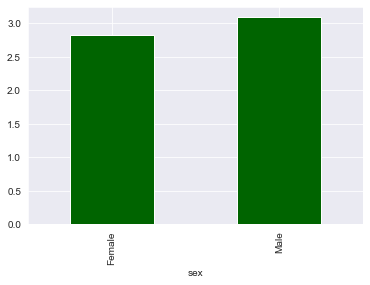

In [79]:
tips.groupby(['sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes, the average tip slightly differs by gender. Male tip slightly more than female

### 8	Does the average tip differ by the time of day?

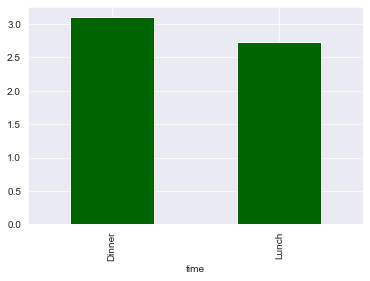

In [80]:
tips.groupby(['time'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()

#### Yes,people give more tip during Dinner compared to Lunch

### 9	Does the average tip differ by size (number of people at the table)? 

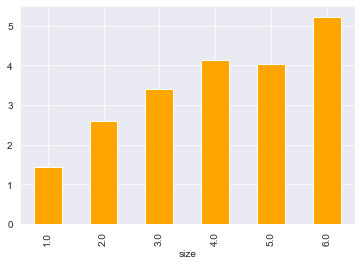

In [83]:
tips.groupby(['size'])['tip'].mean().plot.bar(color="orange")
plt.show()

#### Yes, more the number of people, higer the tip.

### 10	Do smokers tip more than non-smokers?


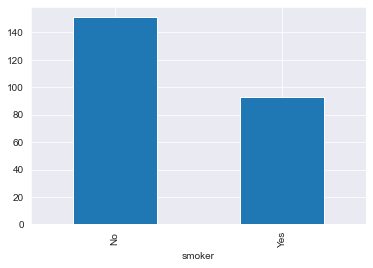

In [86]:
tips.groupby(['smoker'])['tip'].count().plot.bar()

#### No, non smokers give more tip than smokers.

#### 11	Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?


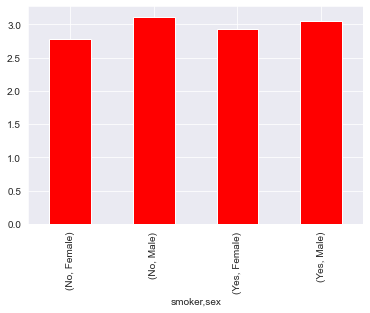

In [87]:
tips.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="red")
plt.show()

In [88]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [89]:
pd.pivot_table(data=tips, index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


#### group with male and non-smoker tips the most.

### 12	Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.


In [90]:
tips.insert(2,"pct_tip",tips.tip/tips.total_bill)
tips.head()

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2.0
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3.0
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3.0
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2.0
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4.0


### 13	Does pct_tip differ by gender? Does one gender tip more than the other?

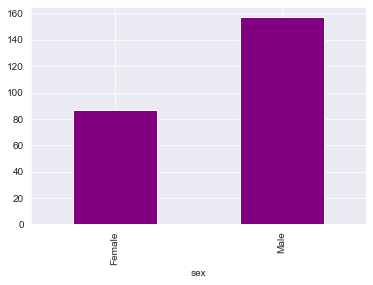

In [93]:
tips.groupby(['sex'])['pct_tip'].count().plot.bar(color="purple")
plt.show()

#### Yes, one gender tip more than other, male gender gives more tip than female gender.

### 14	Does pct_tip differ by size (number of people at the table)? 

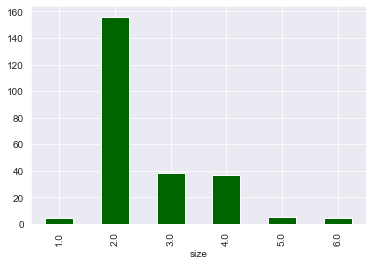

In [94]:
tips.groupby(['size'])['pct_tip'].count().plot.bar(color="darkgreen")
plt.show()

#### yes, pct_tip differ by size.

### 15	Make the gender vs. smoker view using pct_tip  - does your inference change?


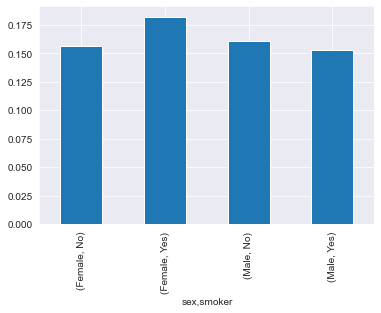

In [97]:
tips.groupby(['sex','smoker'])['pct_tip'].mean().plot.bar()

#### Yes, group with Female smoker gives more average pct_tip

### 16	Make a scatter plot of total_bill vs. tip.


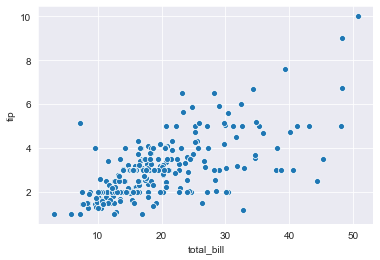

In [98]:
sns.scatterplot(x='total_bill', y='tip', data = tips)

#### Thus, higher the amount of bill, higher the tip

### 17	Make a scatter plot of total_bill vs. pct_tip.


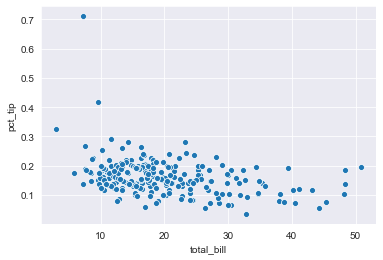

In [99]:
sns.scatterplot(x='total_bill', y='pct_tip', data = tips)

#### Thus, higher the amount of bill doesn't make much difference to pct_bill